In [1]:
%pip install -U pygame matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 317.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 3.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.3 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pygame as pg
import matplotlib.pyplot as plt
pg.init()

pygame 2.5.2 (SDL 2.28.2, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


(5, 0)

In [6]:
simhei = "simhei.ttf"

In [7]:
def get_char_pic(tex, font = "simsun.ttc", size=100):
    '获得字符的位图'
    try:
        fon = pg.font.Font(font, size)
    except:
        fon = pg.font.Font(r'C:\Windows\Fonts\\' + font, size)
    rtext = fon.render(tex, True, (255, 255, 255))
    
    #透明通道有用，不知所以
    return pg.surfarray.array_alpha(rtext), rtext.get_width()==size

In [8]:
c, t = get_char_pic("黑",simhei)

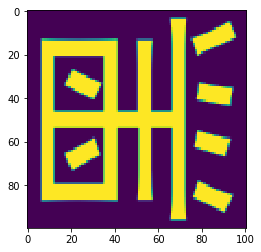

In [9]:
plt.imshow(c)

In [9]:
def stfOfGB2312(h,l):
    '由GB2312区位编码得到字符'
    return bytes([h,l]).decode('GB2312')

class GB2312:
    '可迭代产生GB2312中字符'
    common = range(0xB0,0xF7+1),range(0xA1,0xFE+1) #常用汉字区
    special = range(0xa1,0xa9+1),range(0xa1,0xfe+1) #特殊字符区
    allChar = range(0xa1,0xf7+1),range(0xa1,0xfe+1) #全部2字节字符
    def __init__(self, charType = common):
        self.charType = charType
        self.badCode = 0
        
    def __iter__(self):
        '产生遍历charType的迭代器'
        for hiCode in self.charType[0]:
            for loCode in self.charType[1]:
                try:
                    ch = stfOfGB2312(hiCode,loCode)
                except:
                    self.badCode += 1
                    continue
                else:
                    yield ch

In [10]:
def font_pic_gen(chType=GB2312.common, font="simsun.ttc"):
    label = []
    pics = []
    badWidth = 0
    badCode = 0
    chlib = GB2312(chType)
    for ch in chlib:
        pic,ok = get_char_pic(ch, font)
        if ok:
            pics.append(pic)
            label.append(ch)
        else:
            badWidth += 1
    return pics, label, chlib.badCode, badWidth

In [11]:
pics, label, *bad = font_pic_gen(font=simhei)

In [12]:
len(pics)

6763

In [13]:
data = np.stack(pics)

In [14]:
np.save("simhei", data)

In [15]:
with open("simhei_label.txt", 'wt', encoding='utf') as f:
    f.write("".join(label))

---
# Julia

In [19]:
using Statistics
using LinearAlgebra
using Random
using Dates
using Serialization

using Images
using ImageFiltering
using Plots
using Flux, Flux.Tracker
using BSON
using BSON: @save, @load
using NPZ

SyntaxError: invalid syntax (597066262.py, line 1)

In [17]:
data_o = npzread("simhei.npy");

io = open("simhei_label.txt", "r")
label = read(io, String);

label = collect(label);

NameError: name 'npzread' is not defined

In [3]:
codemap = Dict(label |> enumerate .|> reverse);

In [4]:
size(data_o)

(6763, 100, 101)

In [5]:
dt = mapslices(i->Gray.(i'/255), data_o; dims=(2,3));

In [6]:
charpic(i) = dt[i,:,:]

charpic (generic function with 1 method)

In [7]:
for i in 1:size(dt, 1) #引进全局变量
    eval(Expr(:const, Expr(:(=), Symbol("$(label[i])"), :(dt[$i,:,:]))))
end

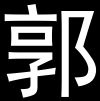

In [8]:
郭

In [9]:
codemap['郭'] == findfirst(x->x=='郭', label)

true

In [10]:
# plotlyjs()
pyplot()

Plots.PyPlotBackend()

In [11]:
blurred = mapslices(i->imfilter(i, Kernel.gaussian(4)), data_o; dims=(2,3));

In [12]:
flatted = reshape(blurred, size(blurred, 1), :);
X = flatted' / 255;

In [13]:
size(X)

(10100, 6763)

### 形近字

In [18]:
function dists_vec(X)
    S = sum(X.^2, dims=1)
    D = -2X'X .+ S .+ S'
    for i in 1:size(D, 1)
        D[i, i] = 0
    end
    return .√D
end

SyntaxError: invalid syntax (3106865215.py, line 1)

In [15]:
D = dists_vec(X);

for i in 1:size(D, 1)
    D[i, i] = Inf
end

In [16]:
minimum(D[:])

5.661142096804238

In [17]:
md = quantile(D[:], 0.0001)

13.535902312100042

In [18]:
applist = []
for i in 1:size(D, 1)
    for j in i+1:size(D, 1)
        if D[i,j] <= md
            push!(applist, (D[i,j], i,j))
        end
    end
end

In [19]:
sort!(applist);

In [20]:
nears = ["$(label[i])$(label[j])" for (_, i, j) in applist];

In [21]:
foreach(i->print(i,"\t"), nears[1:50])

并井	嬴蠃	嬴羸	氽汆	蠃羸	茛莨	己已	赢蠃	麇麋	赢羸	迸进	贵责	干千	赢嬴	楼搂	胃胄	魍魑	视枧	钉钌	溃渍	暑署	撙樽	橇撬	桶捅	薄簿	圃圊	栓拴	麇麈	擅檀	瑗瑷	戍戌	撤撒	扳板	棒捧	撖橄	巳已	桔拮	肼胼	麈麋	营菅	萎蒌	揽榄	铃钤	徵徼	螯螫	擦檫	魈魍	芜芫	梧捂	晓哓	

使用模糊后的欧氏距离作为距离度量，局限有  
* 没有考虑整体与部分的关系、平移关系，（“旧”和“日”）。要么定义距离为田字格、九宫格等划分后，部分与部分、部分与整体的距离加权和；要么优化学习。
* 也没有考虑变形关系（“日”和“曰”）。
* 也没有考虑笔画走向（“并”和“井”）。也许模糊半径在垂直于灰度梯度方向应更大，甚至考虑加动量

In [22]:
nearinds = vcat([[i,j] for (_, i, j) in applist[1:700]]...) |> union;

In [402]:
length(nearinds)

1110

### 常用字

In [23]:
io = open("chinese_char_frequency.txt", "r")
t = readlines(io);

In [24]:
hifre = []
push!(hifre, t[1][4])
for c in t[2:end]
    push!(hifre, c[1])
end

In [25]:
foreach(print, hifre[1:100])

的一是不了我人在有这他来个上说中大为到也道你们出就时以之那和子地得自要着下可而学过生会对么然她国去里后小作文年于能看家心想没好都天只还所起无如多事现发当本成面方种手样但又者见主意经知回头同十身用前从与

In [26]:
hiind = Int[]
for c in hifre
    if c in codemap.keys
        push!(hiind, codemap[c])
    end
end
unique!(hiind);

### PageRank

In [27]:
"M列和为1"
function pagerank(M, eps=1e-8, d=0.85)
    N = size(M, 1)
    v = rand(N)
    v /= sum(v)
    last_v = ones(N) * 100
    M_hat = (d * M) + (((1 - d) / N) * ones(size(M)))
    
    while norm(v-last_v) > eps
        last_v = v
        v = M * v
    end
    return v
end

pagerank

In [28]:
function squared_dists(X)
    S = sum(x->x.^2, X, dims=1)
    D = -2X'X .+ S .+ S'
    for i in 1:size(D, 1)
        D[i, i] = 0
    end
    return D
end

function disttosimilarity(D)
    s = 1 ./ D
    for i in 1:size(s,1)
        s[i,i]=0
    end
    s ./= sum(s,dims=1)#列和归一
end

disttosimilarity (generic function with 1 method)

In [29]:
D = squared_dists(X)
R = pagerank(disttosimilarity(D));

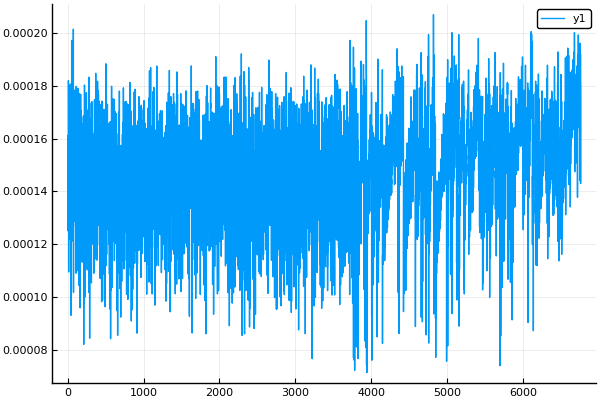

In [30]:
plot(R)

In [31]:
rankinds = sort(1:length(R),by=i->-R[i]);

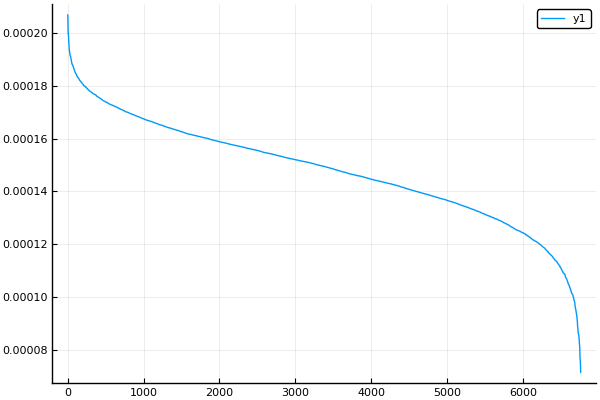

In [32]:
plot(R[rankinds])
# yaxis!(:log)

In [33]:
foreach(print, label[rankinds[1:100]])

懔禀瓣瘭鬻鳜瘾廪骠鬟檩鬃霸癔鬓黧麈噩霾薷懵薰纛鳔膻巅黜攘齄隳霪髦鼍婧廛霆癜蔫镲癫躐黪氅壅謇鲺檀謦俪麇黛瘿瘳戆髻德镱幛嬴僖鬣耀嬗罄樯鸶餍量搋嘉蘖镢艨鳝赡慧睾臆屙麋霭屦鼋鼙鲰韫懿靖藁惶龌橥儒尴靠鲞龇蠃屋榧

## utils

In [34]:
mutable struct SampleingVector{T} <: AbstractVector{T}
    vec::Vector{T}
    rate::Integer
    length::Integer
    maxlength::Int
end

SampleingVector(vec::Vector, rate=1) = SampleingVector(vec, rate, length(vec)*rate, length(vec))
SampleingVector{T}(length::Integer, rate=1) where T = SampleingVector(Vector{T}(), rate, 0, length)
SampleingVector(arg) = SampleingVector(Vector(arg))

mapind(A, ind::Integer) = (ind - 1) ÷ A.rate + 1
Base.size(A::SampleingVector) = (A.length,)
Base.getindex(A::SampleingVector, i::Int) = getindex(A.vec, mapind(A, i))
Base.setindex!(A::SampleingVector, v, i::Int) = setindex!(A.vec, v, mapind(A, i))

maxlength(a::SampleingVector) = a.maxlength #实际容量

function zip_!(a::SampleingVector)
    for i in 2:2:maxlength(a)
        a.vec[i÷2] = a.vec[i]
    end
    a.rate *= 2
    return a
end

function Base.push!(a::SampleingVector, item)
    ind = a.length + 1
    if mapind(a, ind) > maxlength(a) #超出容量
        zip_!(a)
        return push!(a, item)
    else
        if mapind(a, ind) > length(a.vec)
            push!(a.vec, item)
        else
            a[ind] = item
        end
        a.length += 1
        return a
    end
end

downsampled(a::SampleingVector) = @view a.vec[1:mapind(a, a.length)]

function evalcb(;per=1, per_echo=1, loss)
    global epoch
    epoch += 1
    if (epoch-1) % per == 0
        l = loss()
        push!(losslist, l)
        if (epoch-1)%(per*per_echo)==0
            n = now()
            println("$epoch: loss $l\t$n")
        end
    end
end

function plot_char(x, label, csz::Number=10; title::String="", karg...)
    plot(annotations=[(x[1,i], x[2,i], text(label[i], :center, "simhei", csz)) for i in 1:size(x, 2)],
        leg=false, grid=false; karg...)
    lims = [minimum(x, dims=2) maximum(x, dims=2)]
    d = abs.(lims[:,1]-lims[:,2])
    l, t = lims[1,1], lims[2,2]
    lims[:,1] -= 0.05d
    lims[:,2] += 0.05d
    xlims!(lims[1,:]...)
    r = ylims!(lims[2,:]...)
    if !isempty(title)
        r = plot!(annotations=[(l, t, text(title, :left, "FangSong", csz*2))])
    end
    r
end

function plot_compair_scatter(y, label)
    global yo
    if !@isdefined(yo) yo=y end
    po = plot_char(yo, label, 5)
    title!("last")
    pn = plot_char(y, label, 5)
    title!("now")
    yo = copy(y)
    plot(po, pn, size=(850,400))
end

plot_compair_scatter (generic function with 1 method)

## tsne

In [35]:
function neg_squared_dists_vec(X)
    S = sum(x->x.^2, X, dims=1)
    D = 2X'X .- S .- S'
    for i in 1:size(D, 1)
        D[i, i] = 0
    end
    return D
end

"""X:(n_features, n_samples)，返回负的距离的平方"""
neg_squared_dists(X) = neg_squared_dists_vec(X)


"条件概率\$P_{j|i}(j)\$，返回向量，代表条件i下各j的概率"
function Pᵢ(D, i, _2σ²)
    ps = exp.(D[:, i] ./ _2σ²)
    ps[i] = 0
    return ps ./ sum(ps)
end

perplexity(p) = 2^(-sum(p.*log2.(p)))
perplexityofpi(pi) = perplexity(filter(x->x!=0, pi))

"""solve x for evalfn(x)==target with bisection method. 
`evalfn` should be monotone.
If `precision` is achieved, return. Defaults to a extremely small (will never arrive) number.
If `maxiter` is reached, return. Defaults to a extremely big (will never arrive except 
    abnormal condition) number.
If the highest accuracy of float type has been reached, return. This is the default return point.
`lower` and `upper` is a interval suggesstion for searching initial value. Can be set to `evalfn`'s
    domain. Because if the suggesstion is rational, the function will search only within the interval.
    If not, outer point will be searched. Inf and -Inf are also legal.
"""
function bisectionsolve(evalfn, target::Number; precision=1e-100, maxiter=10000,
        lower::Real=-1, upper::Real=1)
    @assert lower < upper
    if lower == -Inf && upper == Inf
        lower = -1
        upper = 1
    elseif lower == -Inf
        lower = upper - 1
    elseif upper == Inf
        upper = lower + 1
    end
    a::Float64 = lower
    b::Float64 = upper
    fa = evalfn(lower)
    fb = evalfn(upper)
    
    if fa > fb #减函数，则取反
        fn = x -> -evalfn(x)
        target = -target
        fa = fn(a)
        fb = fn(b)
    else
        fn = evalfn
    end
    
    counter = 1
    while fa > target
        if counter > maxiter
            error("target value $target maybe unvalaible, or the evalfn is not monotone.")
        end
        counter += 1
        b = a
        fb = fn(b)
        a = lower+1 - (lower+1-a)*2
        fa = fn(a)
    end
    counter = 1
    while fb < target
        if counter > maxiter
            error("target value $target maybe unvalaible, or the evalfn is not monotone.")
        end
        counter += 1
        b = upper-1 + (b-(upper-1))*2
        fb = fn(b)
    end
    for i in 1:maxiter
#         println("$i: ($a, $b);  $(b-a) ($fa, $fb)")
        if fa == target return a end
        if fb == target return b end
                
        if b-a <= precision
            return abs(fa-target) <= abs(fb-target) ? a : b  
        end
        
        m = (a + b) / 2
        if m==a || m==b return m end #达到浮点数最细分辨率
        fm = fn(m)
        if fm < target
            a = m
            fa = fn(a)
        else
            b = m
            fb = fn(b)
        end
        
    end
    e = min(abs(fa-target), abs(fb-target))
    error("error is $e after $max_iter iterations. a=$a, b=$b")
end

function solve_2σ²(D, perp)
    n_samples = size(D, 1)
    sigs = Array{Float64}(undef, n_samples)
    for i in 1:n_samples
        sig = bisectionsolve(s->perplexityofpi(Pᵢ(D, i, s)), perp, lower=0, upper=Inf)
        sigs[i] = sig
    end
    return sigs
end


                
"`p=prob_mat(D, _2σ²s)`, p[j, i] is \$P_{j|i}\$"
function prob_mat(D, _2σ²s)
    ps = [Pᵢ(D, i, _2σ²s[i]) for i in 1:size(D, 1)]
    hcat(ps...)
end

function condprob(X)
    D = neg_squared_dists_vec(X);
    _2σ²s = solve_2σ²(D, 15);
    p_ji = prob_mat(D, _2σ²s)
end

condprob (generic function with 1 method)

In [36]:
function jointprob(X)
    p_ji = condprob(X)
    P_ij = (p_ji + p_ji')/(2size(p_ji,1)) #定义联合分布（是对称的）
    for i in size(P_ij, 1) P_ij[i,i]=0 end
    P_ij
end

"返回距离矩阵"
function squared_dists(X::TrackedArray)
    S = sum(X.^2, dims=1)
    D = -2X'X .+ S .+ S'
end

function q_ij(y)
    D = squared_dists(y)
    numerator = 1 ./ (1 .+ D) #.* (ones(size(D)) - LinearAlgebra.I)
    numerator / sum(numerator)
end

function kl(pij, qij)
    I = diagm(0=>repeat([1],size(pij,1))) #LinearAlgebra.I导致Tracked Array变Array
    sum(pij .* log.((pij+I)./(qij+I)))
end

kl (generic function with 1 method)

In [37]:
dim = 2
# P_ij = jointprob(X)
@load "simhei_P_ij.bson" P_ij
kl(y::TrackedArray{Float64,2}) = kl(P_ij::Array{Float64,2}, q_ij(y))
#@save "simhei_P_ij.bson" P_ij

# P_ij_k3 = jointprob(X);
# @save "simhei_P_ij_k3.bson" P_ij_k3

序列化

In [40]:
#open(f->serialize(f, losslist), "losslist", "w")
# open(f->serialize(f, (epoch, y.data)), "epc_ydata", "w")

losslist = deserialize(open("losslist"))
epoch, ydata = deserialize(open("epc_ydata"))
y = param(ydata)

Tracked 2×6763 Array{Float64,2}:
 -5.3425  24.2742  -24.6728  -24.0564   …   7.72069  -27.3259  -0.244585
 21.2175  23.6701    3.4793    2.67246     24.9975   -26.512   -0.894447

bson序列化

In [125]:
epoch = 15500
# y = param(rand(2, size(X, 2)))
ydata = BSON.load("ydata-$epoch.bson")[:ydata]
y = param(ydata)
losslist = SampleingVector{Float64}(2^14)
kl(y)

3.9774081669401657 (tracked)

In [446]:
z = param(rand(2, size(X, 2)))
@time grads = Tracker.gradient(() -> kl(y), Params(Flux.params(y)))
grads[y]

  9.975565 seconds (2.62 k allocations: 8.862 GiB, 26.38% gc time)


Tracked 2×6763 Array{Float64,2}:
  1.92683e-6  -1.68802e-5   1.90393e-5  …  -5.8632e-6  2.01182e-5  4.20226e-6
 -1.48675e-5  -1.70707e-5  -2.40176e-6     -2.7137e-5  1.80114e-5  8.32738e-6

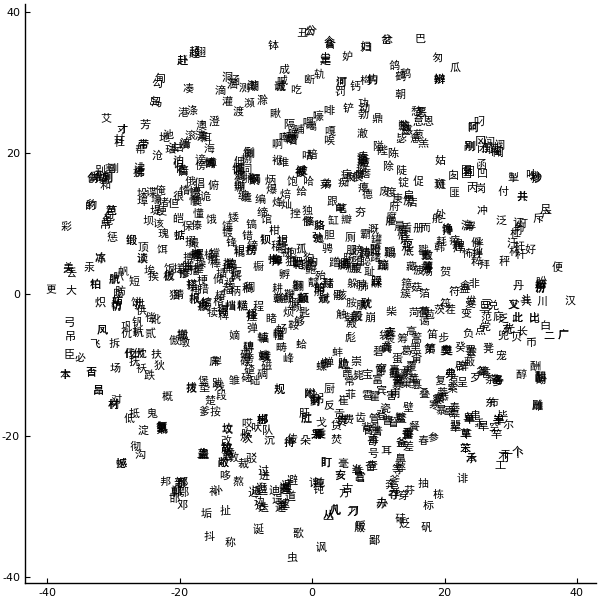

In [41]:
plot_char(y.data[:,1:1000], label, 8; size=(600, 600))

### 训练

```julia
epoch = 0
losslist = SampleingVector{Float64}(2^14)
y = param(rand(dim, size(X, 2)))
kl(y)
```

In [188]:
opt2 = ADAM(Flux.params(y),0.001)

#43 (generic function with 1 method)

In [43]:
32000,54321

(32000, 54321)

62881: loss 2.573177433544801	2019-01-14T13:28:57.803
62901: loss 2.573177433544801	2019-01-14T13:32:09.594
62921: loss 2.573177433544801	2019-01-14T13:35:21.237
62941: loss 2.573177433544801	2019-01-14T13:38:33.564
62961: loss 2.573177433544801	2019-01-14T13:41:44.533
62981: loss 2.573177433544801	2019-01-14T13:44:55.431
--已保存至 ydata-63000.bson--
63001: loss 2.573177433544801	2019-01-14T13:48:07.549
63021: loss 2.573177433544801	2019-01-14T13:51:25.311
63041: loss 2.573177433544801	2019-01-14T13:54:41.34
63061: loss 2.573177433544801	2019-01-14T13:58:02.054
63081: loss 2.573177433544801	2019-01-14T14:01:15.581
63101: loss 2.573177433544801	2019-01-14T14:04:27.543

#2320.915s 240ep	 9.670479166666667 s/ep	 6.204449538220917 eps/min


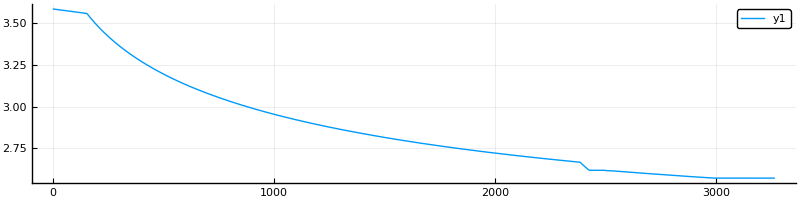

In [453]:
rp = 6*40#*60*2
e0 = epoch
t0 = now()
for i in 1:rp
    η = rand(1:10)/10 * 100
    # println("η = $η")
#     opt = SGD(Flux.params(y), η)
    Flux.train!(kl, [[y]], opt2, cb=()->evalcb(per=10, per_echo=max(1,rp÷100), loss=()->kl(y).data))
    if epoch % 500 == 0 && epoch > 0
        bson("ydata-$epoch.bson", ydata = y.data)
        println("--已保存至 ydata-$epoch.bson--")
    end
end
tp = (now()-t0).value/1000
ne = epoch-e0
println("\n#", tp, "s"," $(ne)ep", "\t $(tp/(ne)) s/ep", "\t $(ne/tp*60) eps/min")
plot(losslist[1500:end], size=(800, 200))

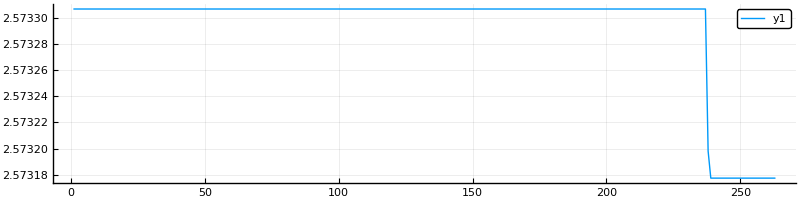

In [461]:
plot(losslist[4500:end], size=(800, 200))
# yaxis!(:log)

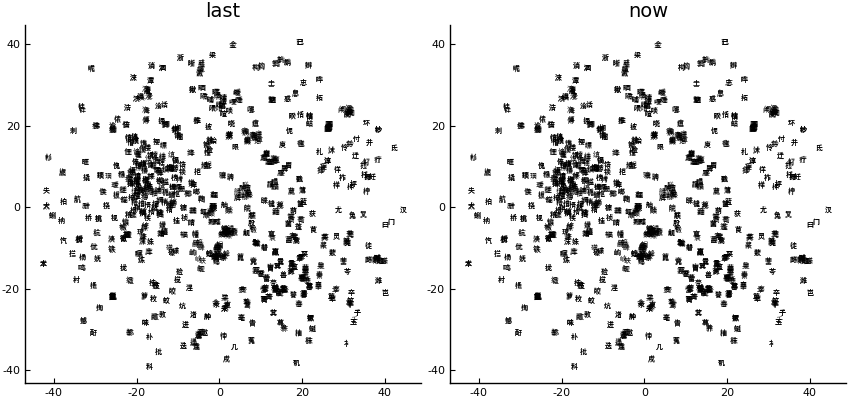

In [452]:
plot_compair_scatter(y.data[:,nearinds], label[nearinds])

### 结果图片

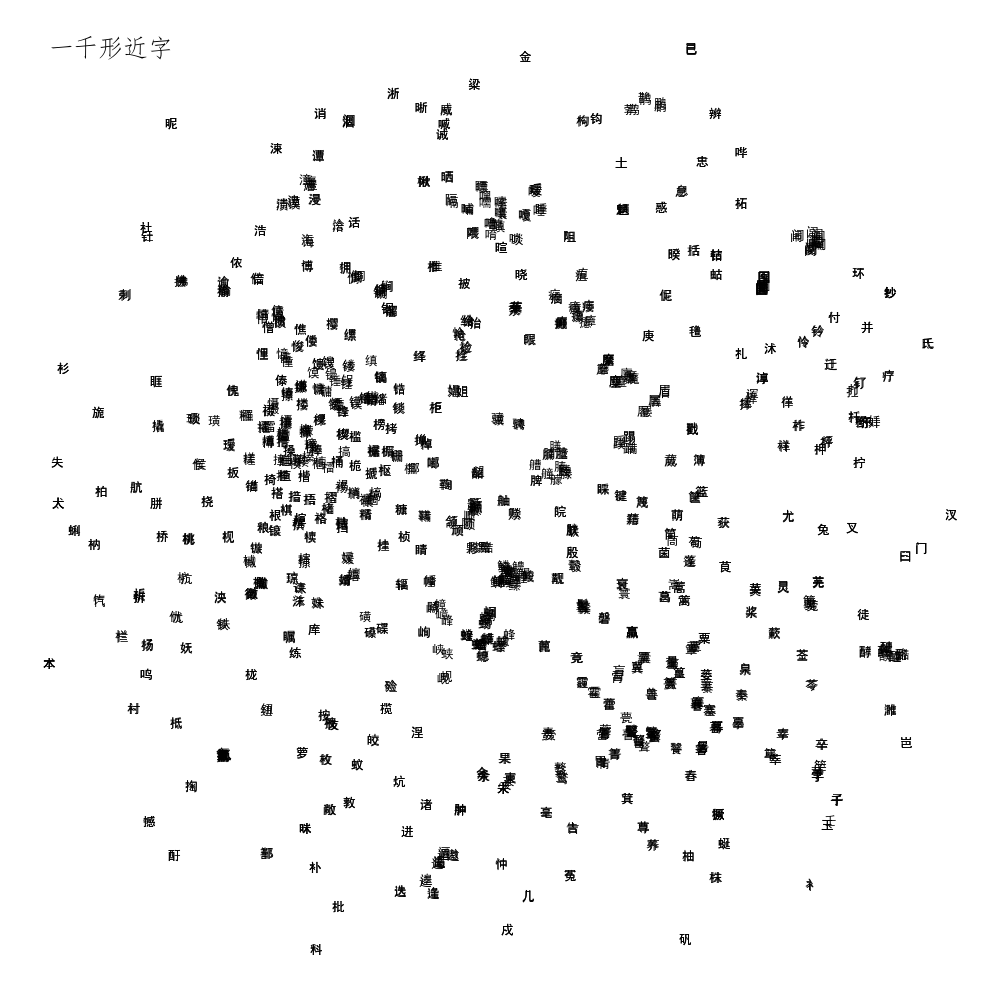

In [184]:
plot_char(y.data[:,nearinds], label[nearinds], 9; size=(1000, 1000), axis=false, title="一千形近字")

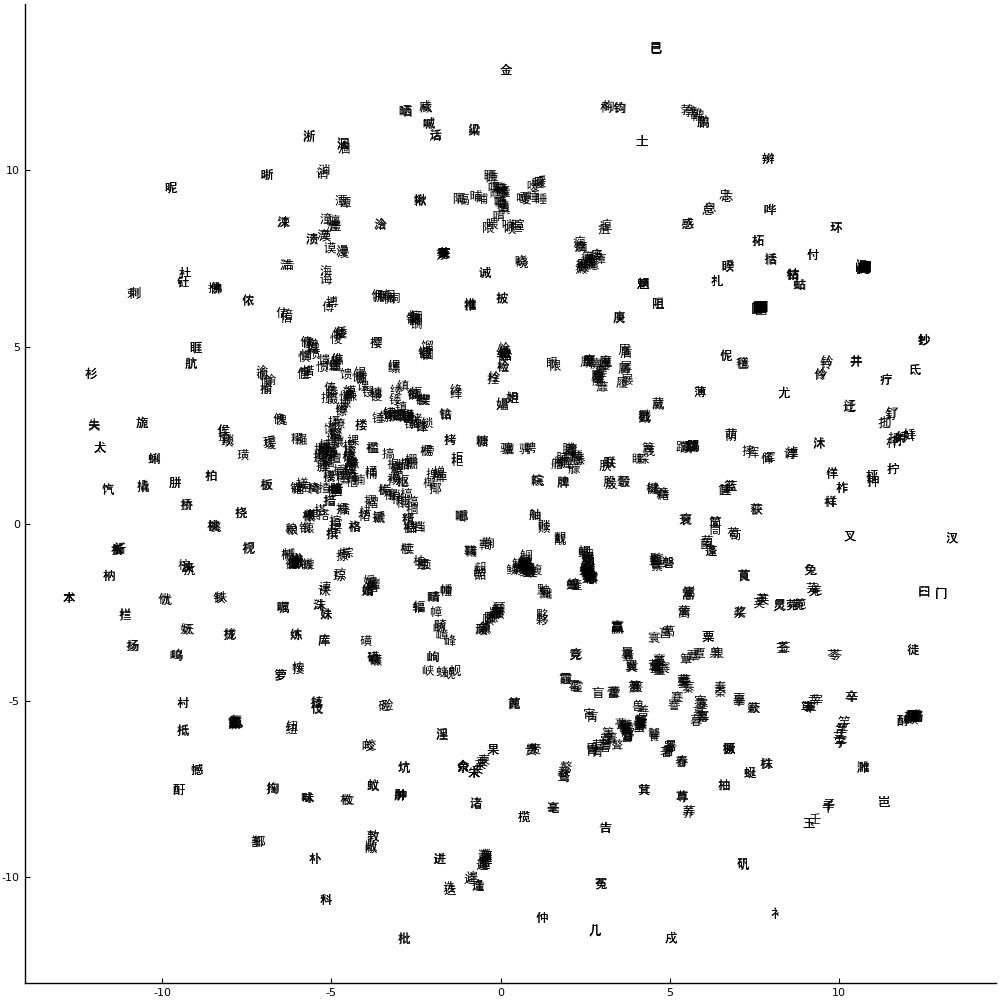

In [576]:
ydata = BSON.load("ydata-32000.bson")[:ydata]
plot_char(ydata[:,nearinds], label[nearinds], 9; size=(1000, 1000), axis=true)

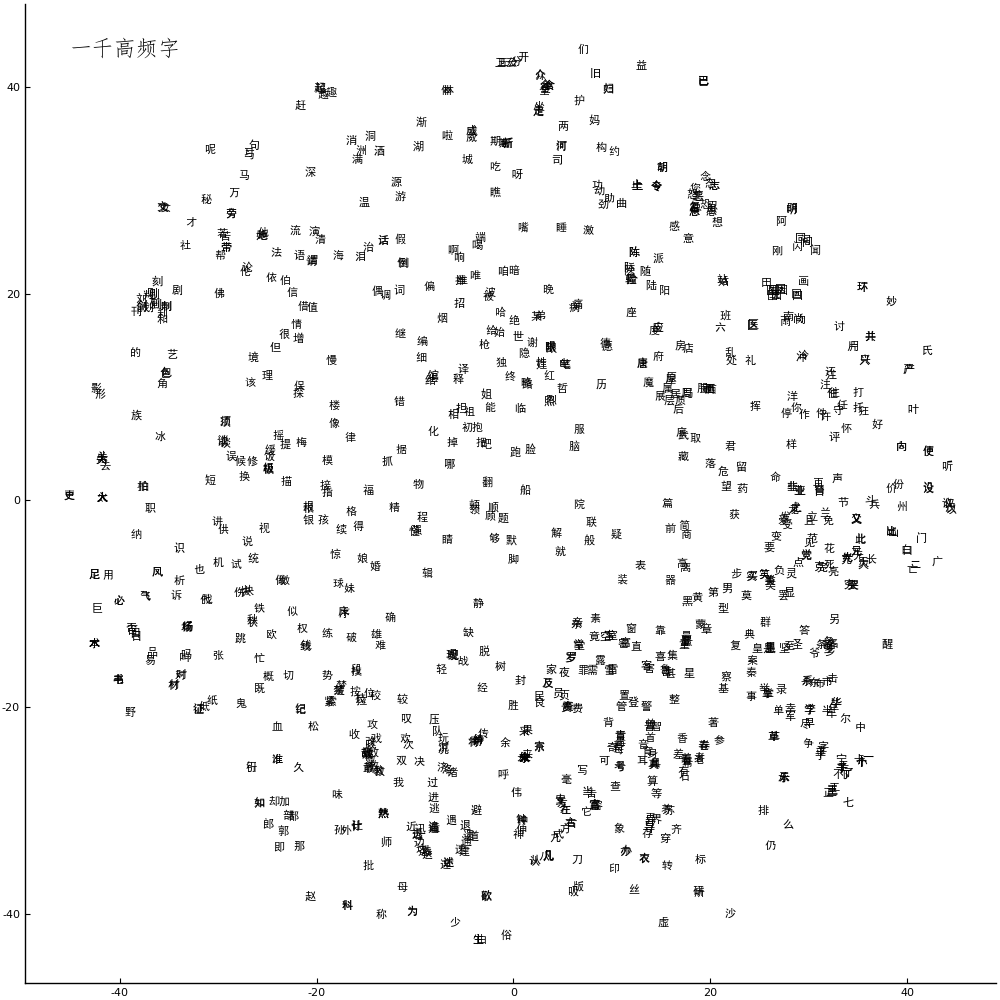

In [185]:
plot_char(y.data[:,hiind[1:1000]], label[hiind[1:1000]], 8; size=(1000, 1000), axis=true,title="一千高频字")

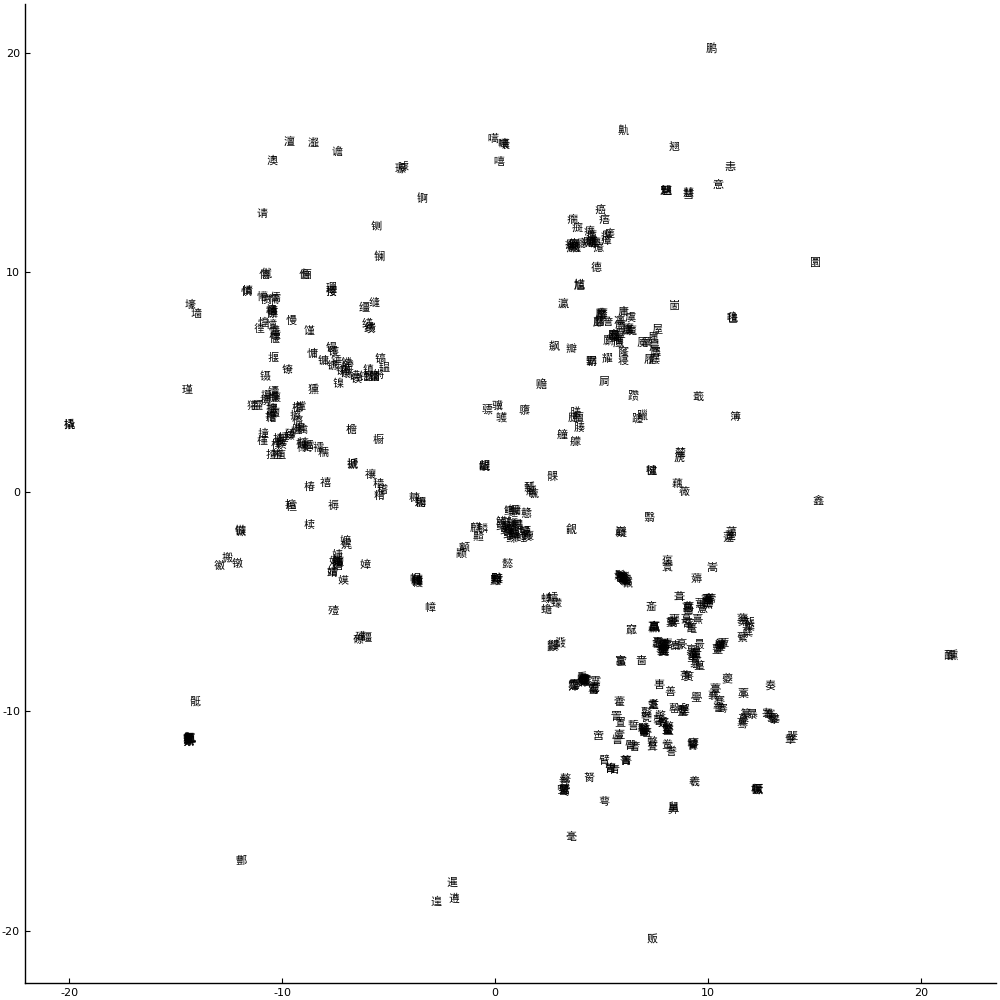

In [579]:
plot_char(y.data[:,rankinds[1:500]], label[rankinds[1:500]], 8; size=(1000, 1000), axis=true)

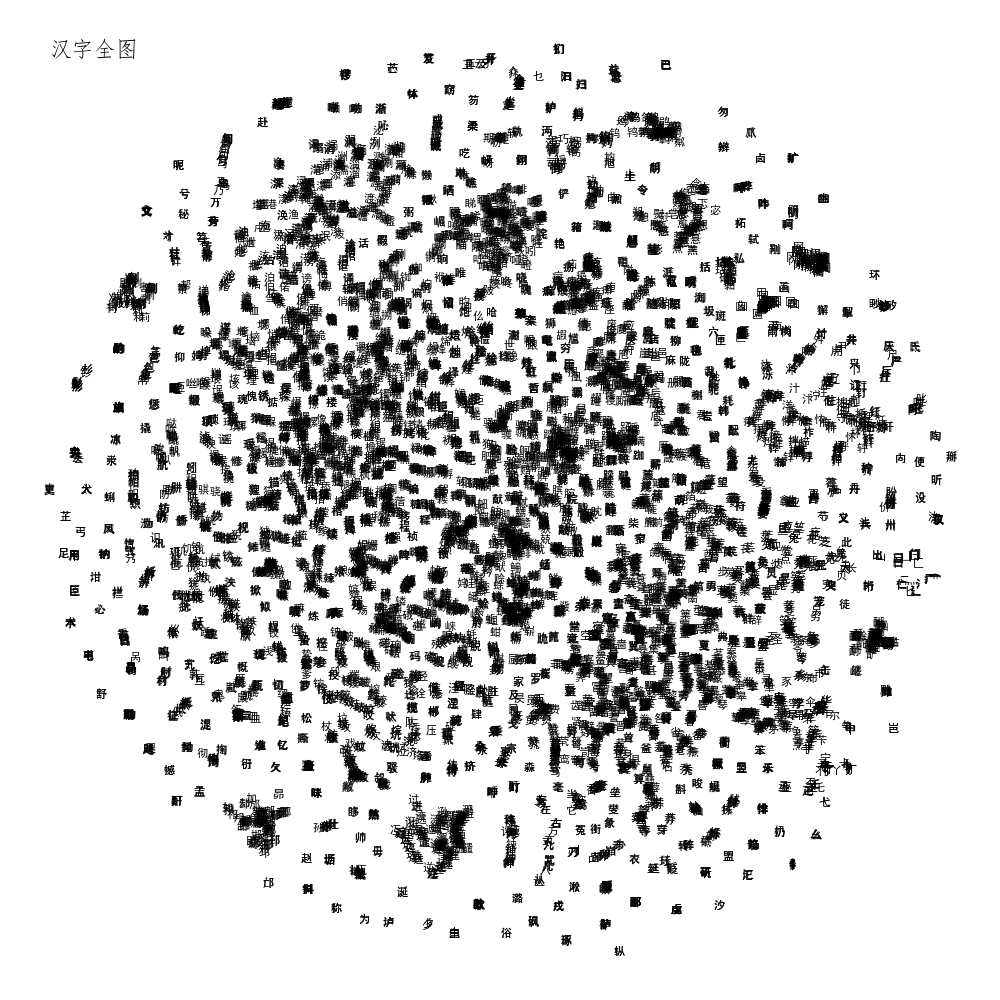

In [596]:
plot_char(y.data, label, 8; size=(1000, 1000), axis=false, title="汉字全图")

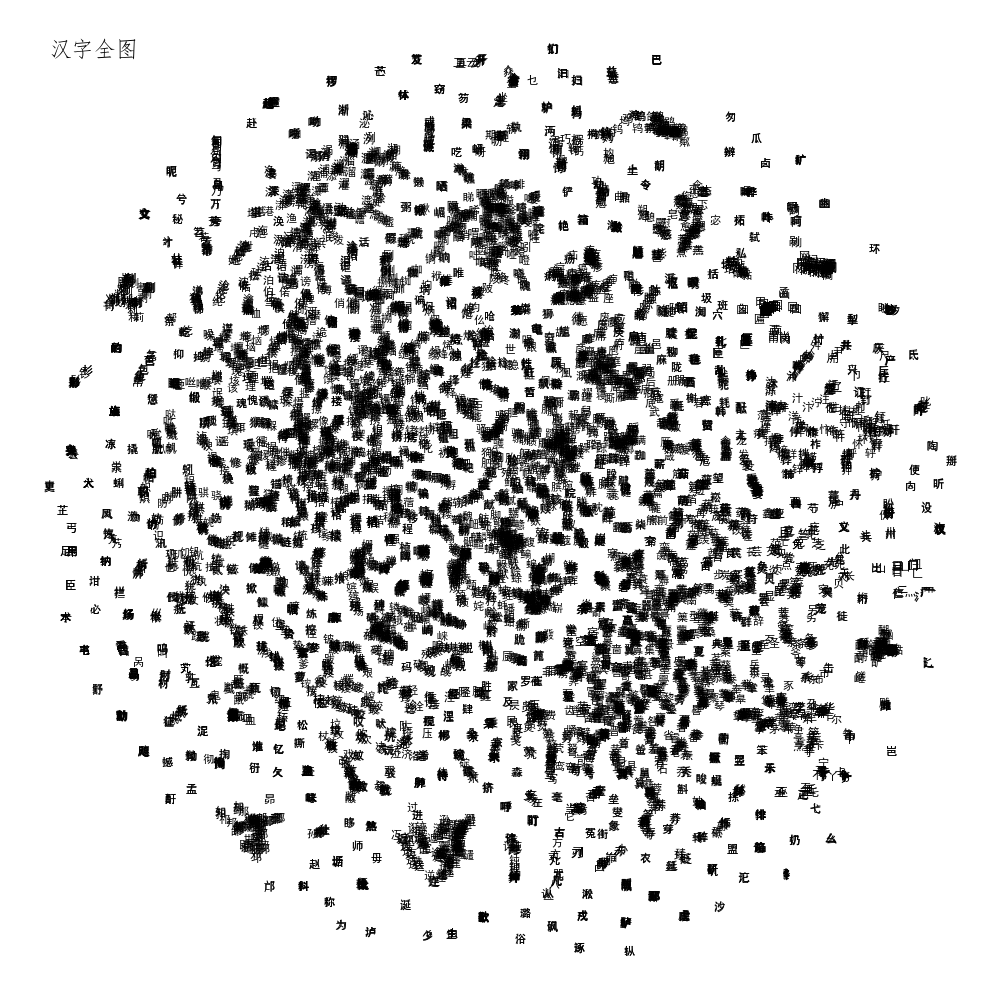

In [578]:
plot_char(y.data, label, 8; size=(1000, 1000), axis=false, title="汉字全图")

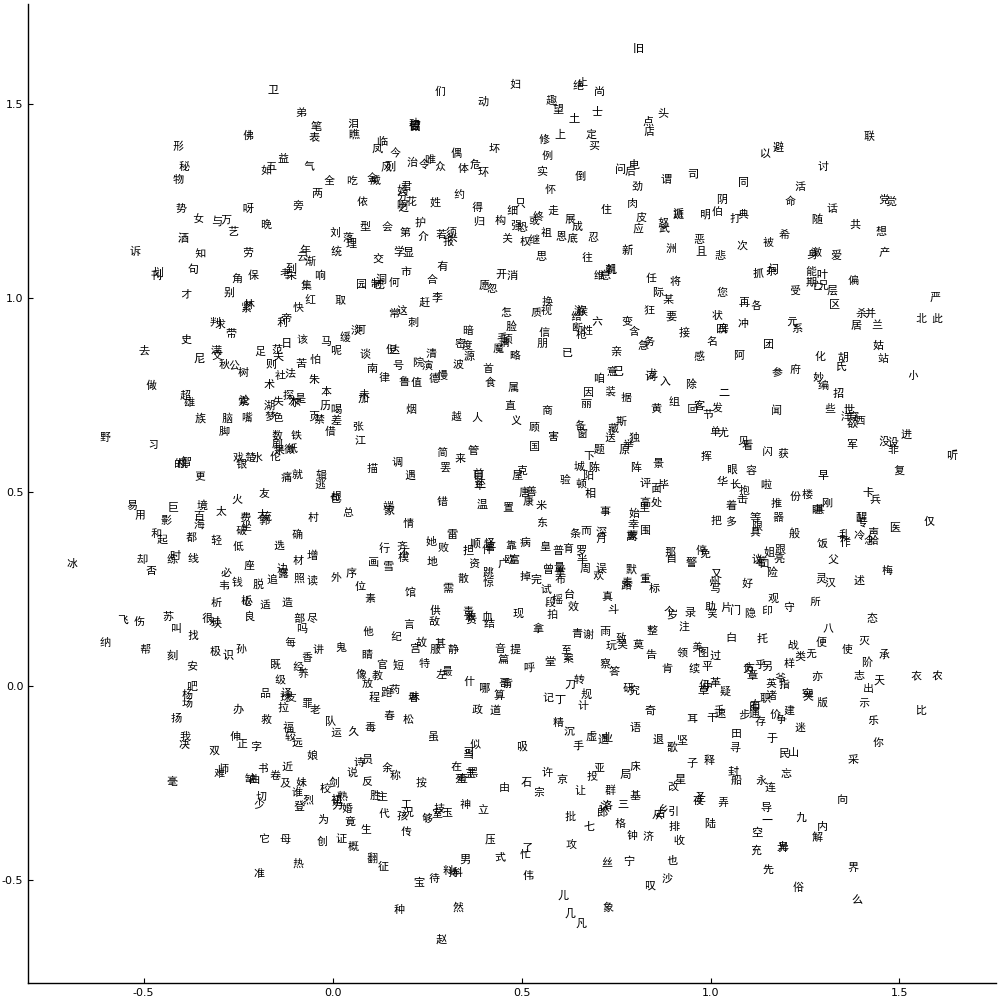

In [66]:
ydata = BSON.load("ydata-32000.bson")[:ydata]
plot_char(ydata[:,hiind[1:1000]], label[hiind[1:1000]], 8; size=(1000, 1000), axis=true)

#### 训练过程动图

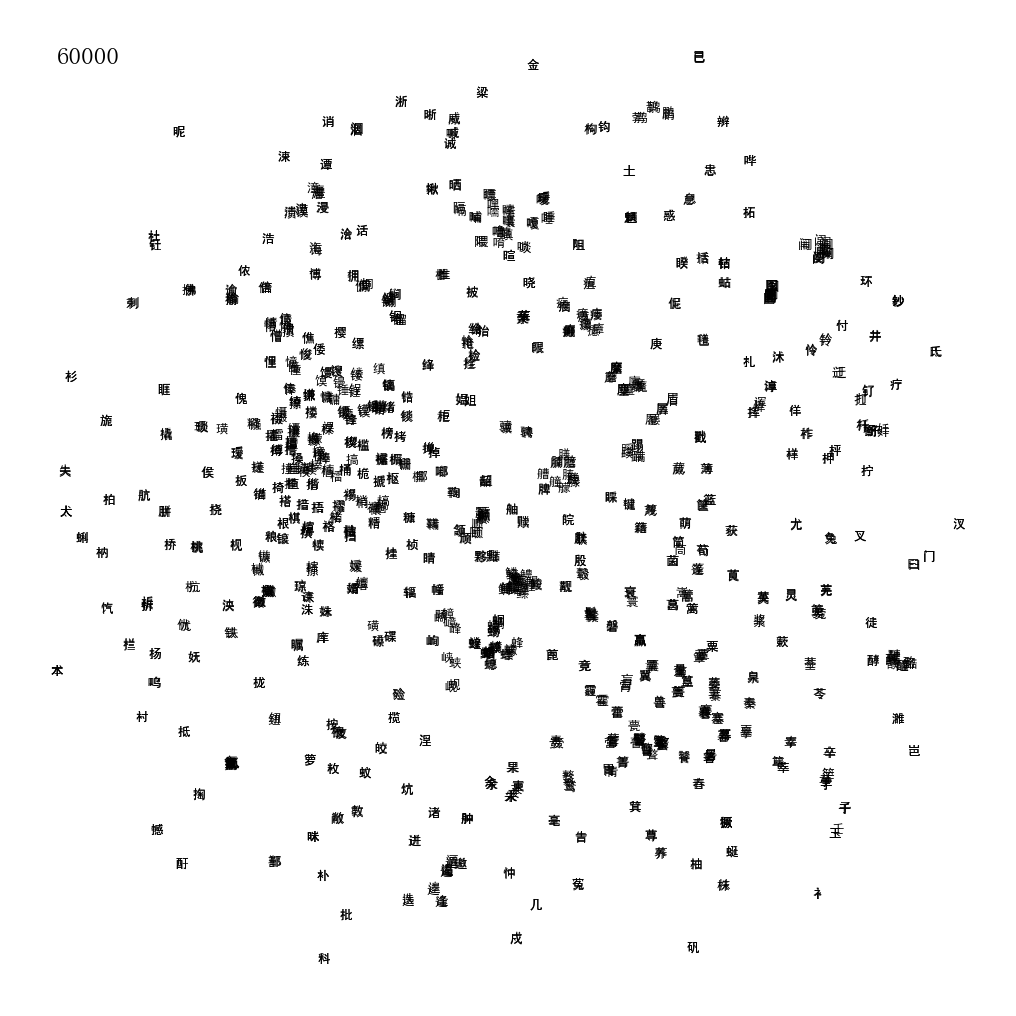

Animation("C:\\Users\\momos\\AppData\\Local\\Temp\\jl_1D38.tmp", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000110.png", "000111.png", "000112.png", "000113.png", "000114.png", "000115.png", "000116.png", "000117.png", "000118.png", "000119.png"])

In [171]:
anim = @animate for ep in 1000:500:60000
    ydata = BSON.load("ydata-$ep.bson")[:ydata]
    plot_char(ydata[:,nearinds], label[nearinds], 9; size=(1000, 1000), axis=false, title="$ep")
end

In [172]:
gif(anim, "1K-60K.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = D:\Work\jupyter\流形学习\1K-60K.gif
└ @ Plots C:\Users\momos\.julia\packages\Plots\krxJ6\src\animation.jl:90


Plots.AnimatedGif("D:\\Work\\jupyter\\流形学习\\1K-60K.gif")

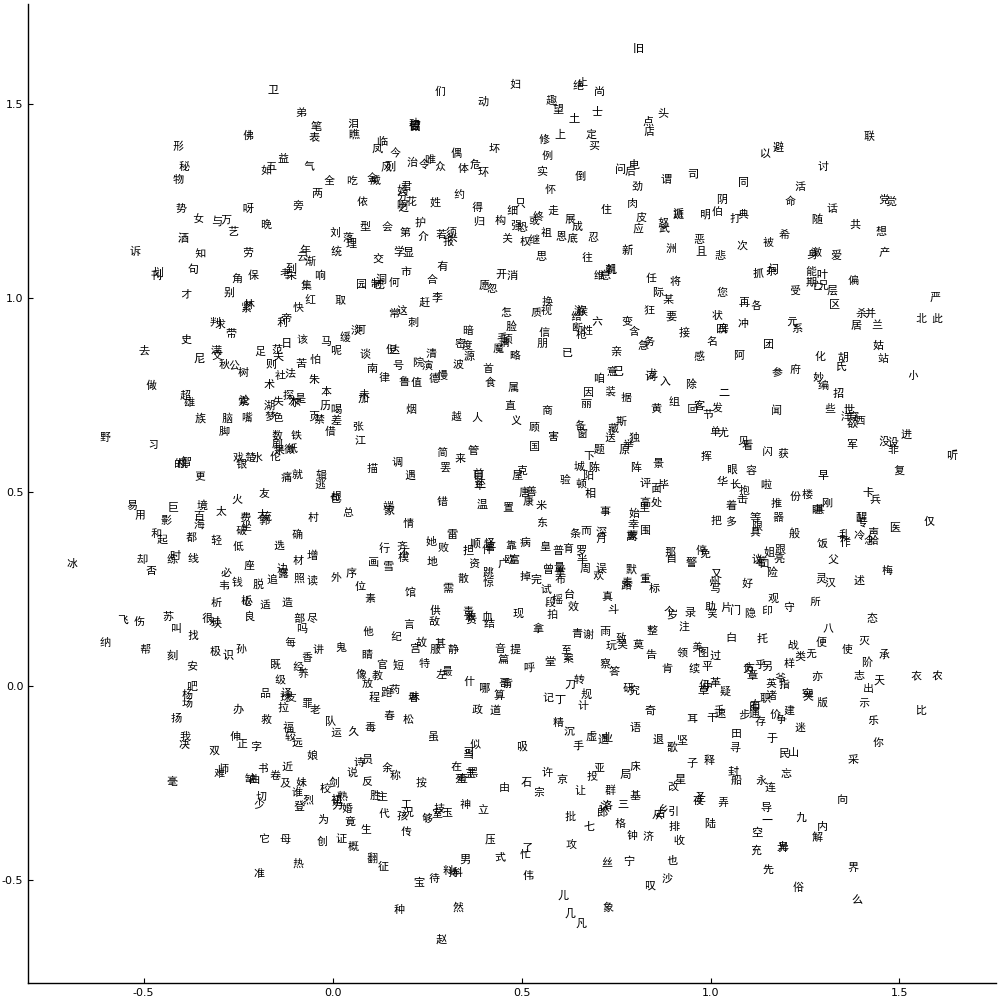

In [170]:
ydata = BSON.load("ydata-1000.bson")[:ydata]
plot_char(ydata[:,hiind[1:1000]], label[hiind[1:1000]], 8; size=(1000, 1000), axis=true)

### 去重叠

In [454]:
# ydata = BSON.load("ydata-10500.bson")[:ydata]
ydata = y.data
xx = ydata[:,nearinds]
l = label[nearinds];

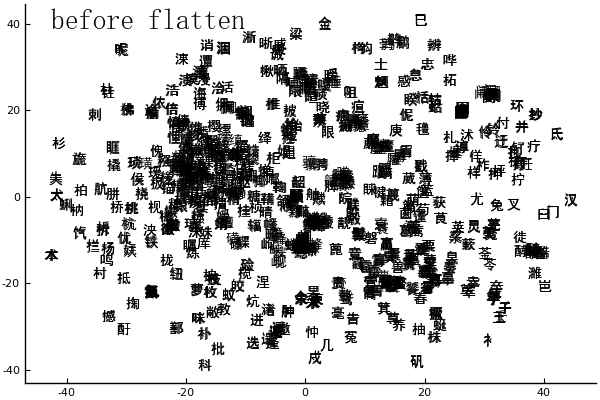

In [194]:
plot_char(xx, l,title="before flatten")

探索合适的距离

In [195]:
cc = ydata[:, [codemap['马'],codemap['湖']]]
c1 = cc[:,1]
c2 = cc[:,2]
norm(c1-c2)

17.97441920416254

### 距离重映射

#### 目标距离函数

双曲线

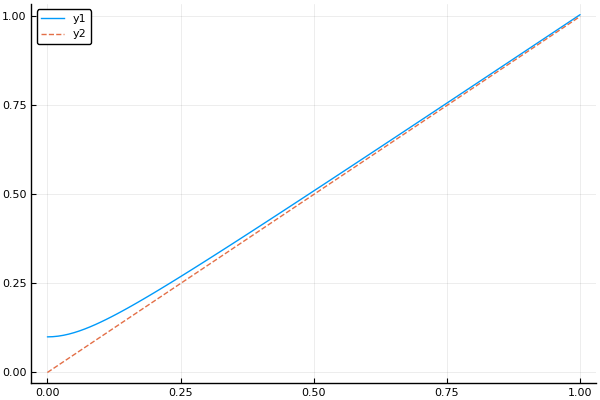

In [196]:
d = 0.1
plot(x -> √(x^2 + d^2), 0:0.01:1)
plot!(x->x, 0:1, ls=:dash)

$d_{new}=\sqrt{d_{old}^2+d_{min}^2}$，即$d_{new}^2 = d_{old}^2+d_{min}^2$

In [197]:
10/√21

2.182178902359924

原始距离x超过 2.18 倍d时，对x的增补不足一成（x/10）。增补下降的速度不可控。

In [198]:
function squared_dists(X)
    S = sum(X.^2, dims=1)
    D = -2X'X .+ S .+ S'
end

squared_dists (generic function with 2 methods)

In [ ]:
dmin = 1.5

In [ ]:
Dnew = squared_dists(xx) .+ dmin^2
for i in 1:size(xx,2)
    Dnew[i,i] = 0
end

分式方程

$y=\frac{a}{b+x}+x$ 增量为$\frac{a}{b+x}$；初始点增量为$a/b$；$x>9b$时，绝对增量不足$\frac{a/b}{10}$  
设初始增量$d$，十分之$d$增量对应长度为$k$倍的$d$，则有：$b=kd/9$，$a=kd^2/9$  
注：当$a<b^2$即$k>9$时有$y'>0$ $(x\geqslant0)$

In [ ]:
d = dmin
k = 10
a = k*d^2/9
b = k*d/9
@assert a>0 && b>0
@assert a<b^2
a,b

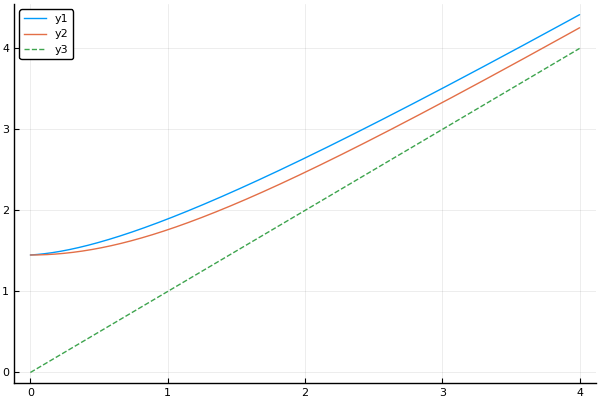

In [368]:
plot(x->a/(b+x)+x,0:0.01:4)
plot!(x -> √(x^2 + d^2), 0:0.01:4)
plot!(x->x, 0:4, ls=:dash)

In [455]:
Dold = squared_dists(xx)
for i in 1:size(Dold,2)
    Dold[i,i] = 0
end
Dold = .√Dold
f(x) = a/(b+x)+x
Dnew = f.(Dold)
Dnew = Dnew .^ 2
for i in 1:size(Dnew,2)
    Dnew[i,i] = 0
end

#### 损失

In [413]:
function loss(D, D_true)
    I = diagm(0=>repeat([1],size(D,1)))
    p = 0.5
    d = map(i->min(i...), zip(D.data, D_true))
    sc = exp.(d ./ dmin * p) #优先保证邻近的距离（局部）。p含义为：距离为(7÷p)倍dmin时，系数约为1/1000
    #p越小，训练越慢，对全局结构的保持越好；p越大，训练越快，对全局结构破坏越大
    k = 500.
    dD = leakyrelu.(D_true-D, 1/k) #优先保证距离要足量。距离不足比距离过长重要k倍
    sum((dD./sc).^2)
end
loss(x::TrackedArray{Float64,2}) = loss(squared_dists(x), Dnew::Array{Float64,2})

loss (generic function with 2 methods)

In [216]:
epoch2 = 0
losslist2 = SampleingVector{Float64}(2^14)
x = param(xx)
loss(x)

7442.169351951197 (tracked)

In [336]:
x = param(BSON.load("yflat-75600.bson")[:yflat])

Tracked 2×1110 Array{Float64,2}:
 45.0414  46.4187   19.7891   20.3124  …  -31.8232   35.3531   34.0111
 19.5785  19.2908  -12.7472  -11.4476      13.5382  -31.0319  -30.6289

In [110]:
@time loss(x)
@time grads = Tracker.gradient(() -> loss(x), Params(Flux.params(x)))
grads[x]

  0.211387 seconds (161 allocations: 94.058 MiB, 72.16% gc time)
  0.279729 seconds (3.45 k allocations: 216.667 MiB, 52.21% gc time)


Tracked 2×1110 Array{Float64,2}:
 0.0236229  -0.0236229   0.269791   0.619897  …  5.18699  -3.19727  -3.32956
 0.0229438  -0.0229438  -1.10965   -1.03469      2.49945   3.86295   4.01993

In [524]:
opt2 = ADAM(Flux.params(x), 0.0001)

#43 (generic function with 1 method)

In [218]:
function evalcb2()
    global epoch2
    epoch2 += 1
    push!(losslist2, loss(x).data)
end

evalcb2 (generic function with 1 method)

--已保存至 yflat-300700.bson--
--已保存至 yflat-300800.bson--
--已保存至 yflat-300900.bson--
--已保存至 yflat-301000.bson--
--已保存至 yflat-301100.bson--
--已保存至 yflat-301200.bson--
--已保存至 yflat-301300.bson--
--已保存至 yflat-301400.bson--
--已保存至 yflat-301500.bson--
--已保存至 yflat-301600.bson--
--已保存至 yflat-301700.bson--
--已保存至 yflat-301800.bson--
--已保存至 yflat-301900.bson--
--已保存至 yflat-302000.bson--
--已保存至 yflat-302100.bson--
--已保存至 yflat-302200.bson--
--已保存至 yflat-302300.bson--
--已保存至 yflat-302400.bson--
--已保存至 yflat-302500.bson--
--已保存至 yflat-302600.bson--
--已保存至 yflat-302700.bson--
--已保存至 yflat-302800.bson--
--已保存至 yflat-302900.bson--
--已保存至 yflat-303000.bson--
--已保存至 yflat-303100.bson--
--已保存至 yflat-303200.bson--
--已保存至 yflat-303300.bson--
--已保存至 yflat-303400.bson--
--已保存至 yflat-303500.bson--
--已保存至 yflat-303600.bson--
--已保存至 yflat-303700.bson--
--已保存至 yflat-303800.bson--
--已保存至 yflat-303900.bson--
--已保存至 yflat-304000.bson--
--已保存至 yflat-304100.bson--
--已保存至 yflat-304200.bson--
--已保存至 yflat-304300.bson--
-

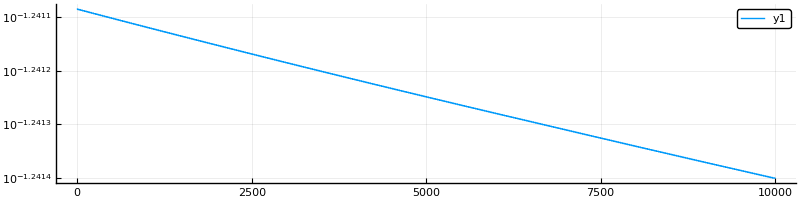

In [554]:
rp = 100*60#*60*11#4000
e0 = epoch2
t0 = now()
for i in 1:rp
    η = rand(1:10)/10 * 100
    # println("η = $η")
#     opt2 = SGD(Flux.params(x), 0.00001)
    rd = rand(Float64, size(x))/100
    Flux.train!(loss, [[x]], opt2, cb=evalcb2)
    if epoch2 % 100 == 0
        bson("yflat-$epoch2.bson", yflat = x.data)
        println("--已保存至 yflat-$epoch2.bson--")
    end
end
tp = (now()-t0).value/1000
ne = epoch2-e0
println("\n#", tp, "s"," $(ne)ep", "\t $(tp/(ne)) s/ep", "\t $(ne/tp*60) eps/min")
println("current epcoh: $epoch2")
plot(losslist2[end-10000:end], size=(800, 200))
yaxis!(:log)

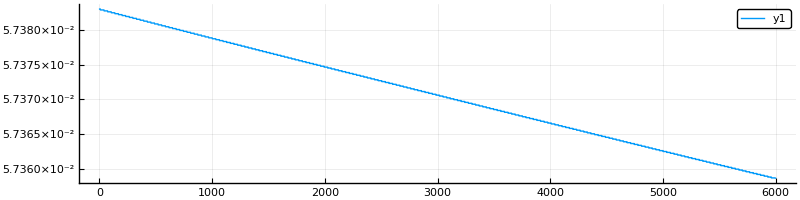

In [555]:
plot(losslist2[end-6000:end], size=(800, 200))
# yaxis!(:log)

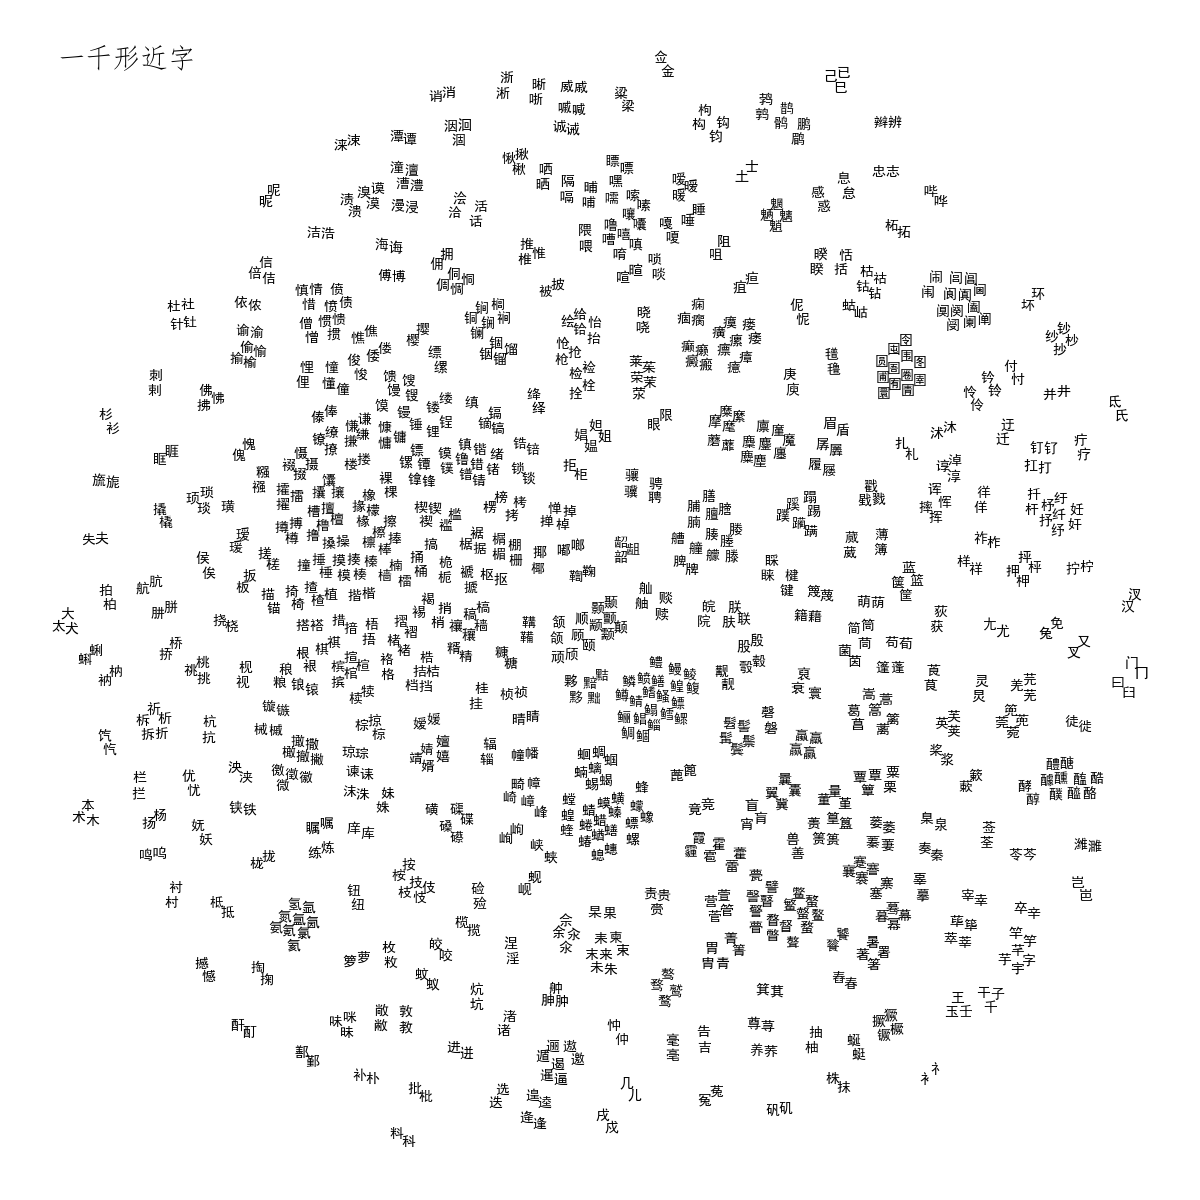

In [559]:
plot_char(x.data, l, 10; size=(1200, 1200),axis=false, title="一千形近字")
# scatter!([0,dmin],[0,0])

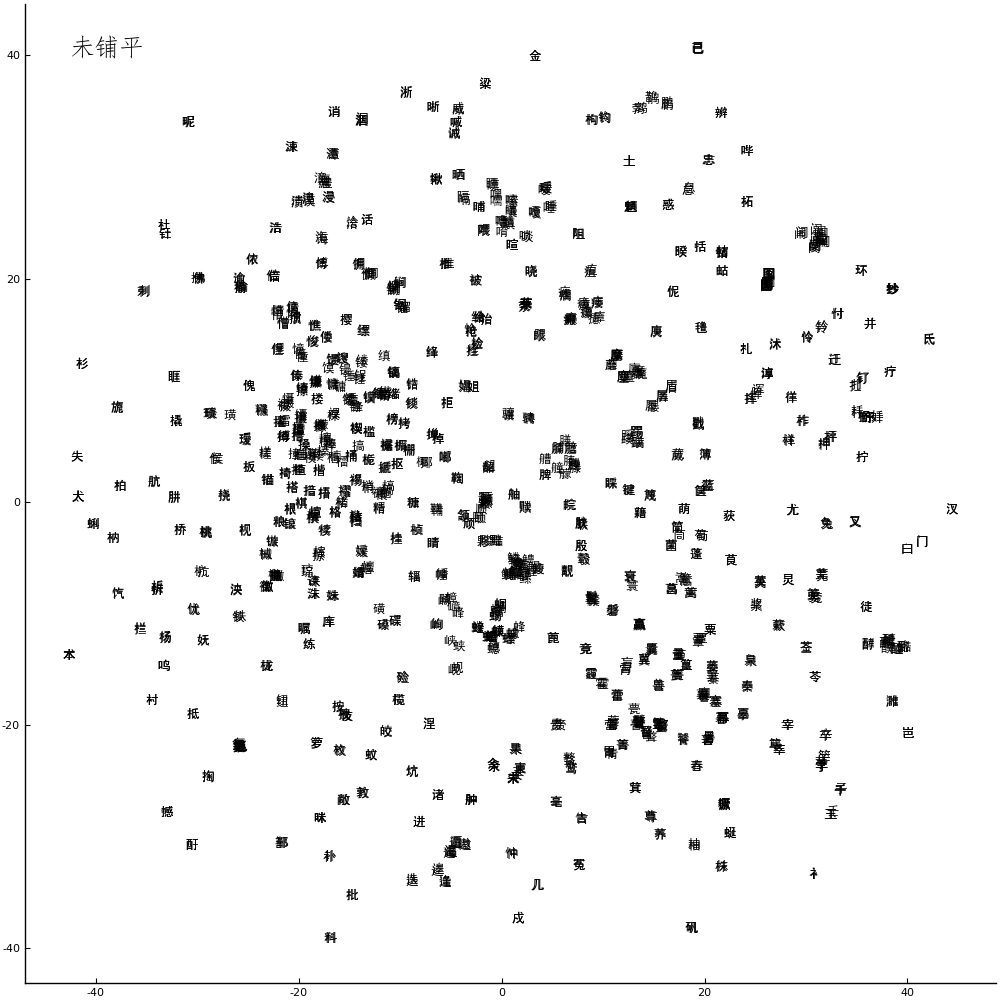

In [327]:
plot_char(xx, l, 9; size=(1000, 1000),axis=true, title="未铺平")

#### 训练过程动图

In [ ]:
anim = @animate for ep in Iterators.flatten((0:100:1000, 1200, 1500:500:23000))
    ydata = ep==0 ? xx : BSON.load("yflat-$ep.bson")[:yflat]
    plot_char(ydata, l, 9; size=(1000, 1000), axis=false, title="$ep")
end

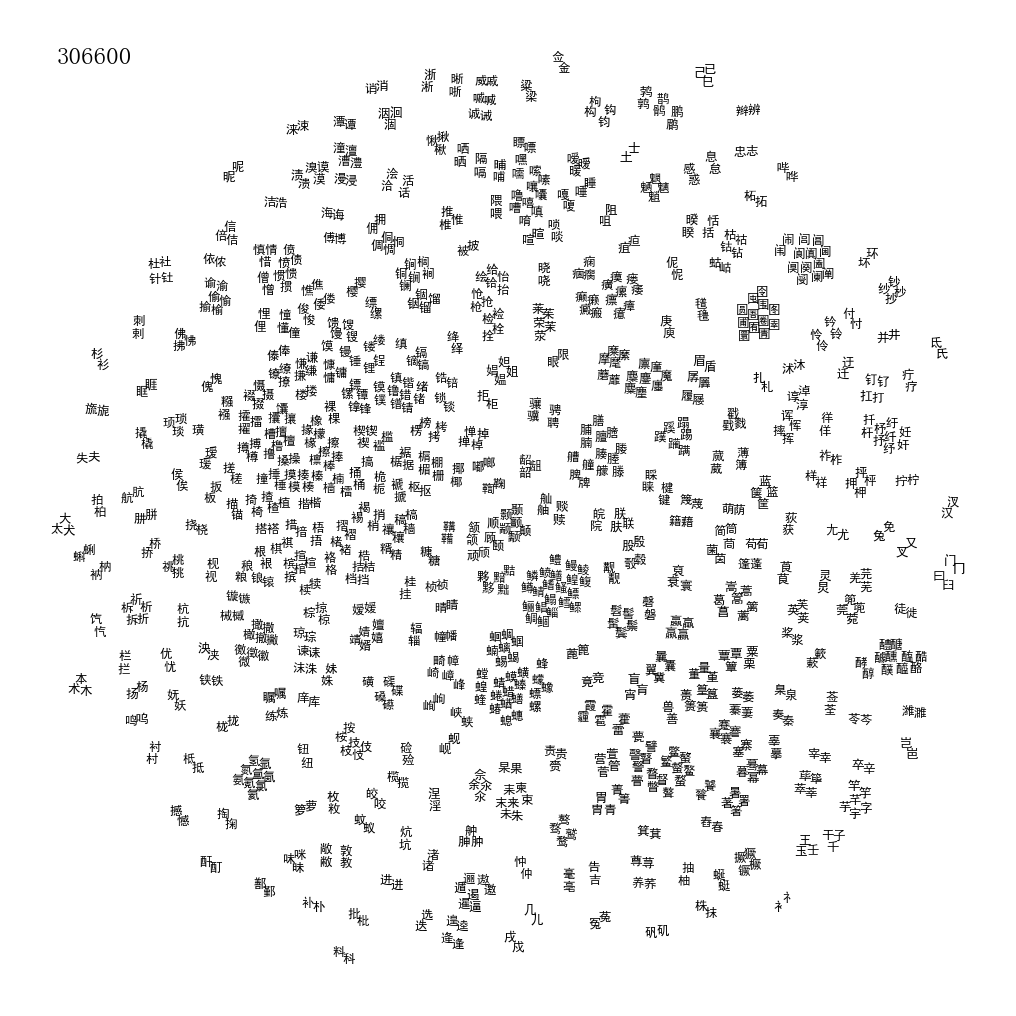

Animation("C:\\Users\\momos\\AppData\\Local\\Temp\\jl_760.tmp", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png", "000011.png"])

In [557]:
anim = @animate for ep in Iterators.flatten((epoch2-1000:100:epoch2,))
    ydata = ep==0 ? xx : BSON.load("yflat-$ep.bson")[:yflat]
    plot_char(ydata, l, 9; size=(1000, 1000), axis=false, title="$ep")
end

In [558]:
gif(anim, "flatenend.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = D:\Work\jupyter\流形学习\flatenend.gif
└ @ Plots C:\Users\momos\.julia\packages\Plots\krxJ6\src\animation.jl:90


Plots.AnimatedGif("D:\\Work\\jupyter\\流形学习\\flatenend.gif")